In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


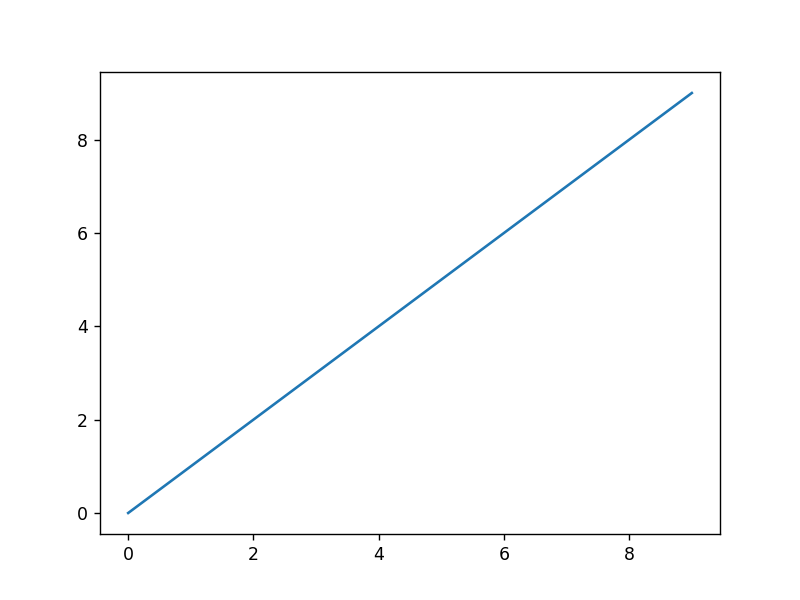

In [6]:
plt.plot(data)

Plots in matplotlib reside within(驻留) a **Figure** object.  **Create a new figure with `plt.figure`**. `plt.figure` 有许多参数，特别是figure，它用于确保当图片存到磁盘时具有一定的大小和纵横比(guarantee the figure has a certain size and aspect ratio if saved to disk)

<IPython.core.display.Javascript object>


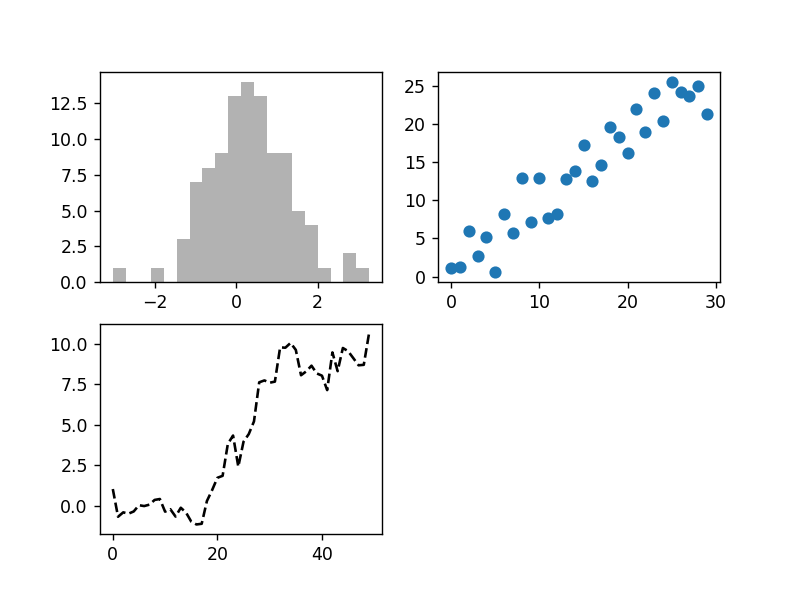

In [7]:
fig = plt.figure()

> In IPython, an empty plot will appear, but in jupyter nothing will be shown till u using a few more commands.

Can't make a plot with a blank figure. **Create one or more subplots using `add_subplot`**.

In [8]:
ax1 = fig.add_subplot(2, 2, 1)  # or ax1 = fig.add_subplot(221)

> 代码的意思：图像是2 x 2的，且是当前选中的是4个中的第一个（编号从1开始）。

create the next two subplots

In [9]:
ax2 = fig.add_subplot(222)

In [10]:
ax3 = fig.add_subplot(223)

> 上图是交互式的，在逐步运行中可以看到变化。

**One nuance (细微差别) of using Jupyter notebooks is that plots are reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.**

```python
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
```

issue a plotting command like `plt.plot([1.5, 3.5, -2, 1.6])`, **matplotlib draws on the last figure and subplot used (creating one if necessary)**, thus hiding the figure and subplot creation.

**pyplot具有状态性特性，能跟踪当前图形和绘图区域的状态。调用函数时，函数只对当前图形起作用。**

In [12]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

The **'k--'** is a *style* option instructing matplotlib to plot a black dashed line (黑色虚线图).

The objects returned by `fig.add_subplot` here are **AxesSubplot** objects, on which u can directly plot on the other empty subplots by calling each one's instance method.&emsp;由`fig.add_subplot`返回的是**AxesSubplot** 对象，直接调用它们的实例方法可以在空着的子图里画图。

In [13]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=.3)

In [14]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

根据特定布局创建Figure和subplot很常见

**`plt.subplots` create a new few and returns a NumPy array containing the created subplot objects**

<IPython.core.display.Javascript object>


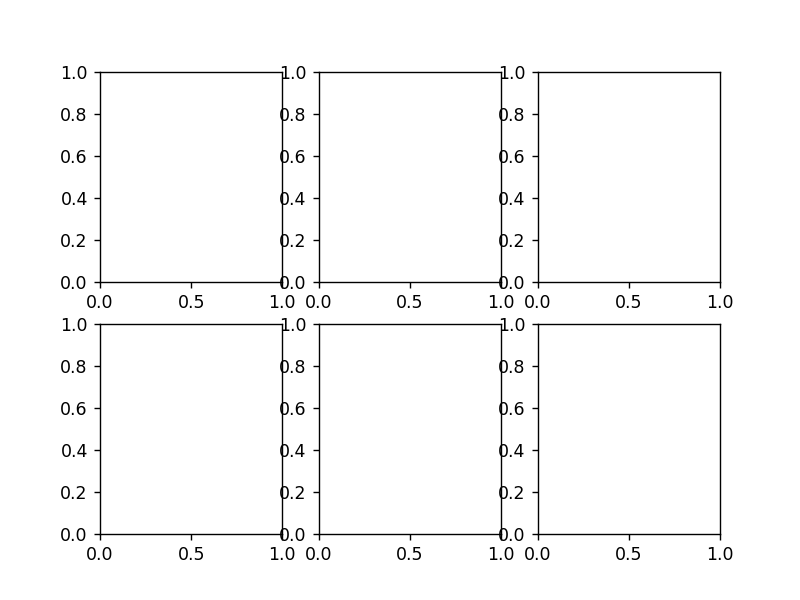

In [24]:
fig, axes = plt.subplots(2, 3)

In [16]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242C8CD87B8>,
      dtype=object)

可以轻松地对`axes`进行索引，如`axes[0, 1]`。

通过`sharex`和`sharey`指定subplots应该具有相同的X轴和Y轴（x- or y- axis）。在比较相同范围内的数据时很实用。否则matplotlib将会自动缩放各图表的界限（matplotlib autoscales plot limits independently）。

<IPython.core.display.Javascript object>


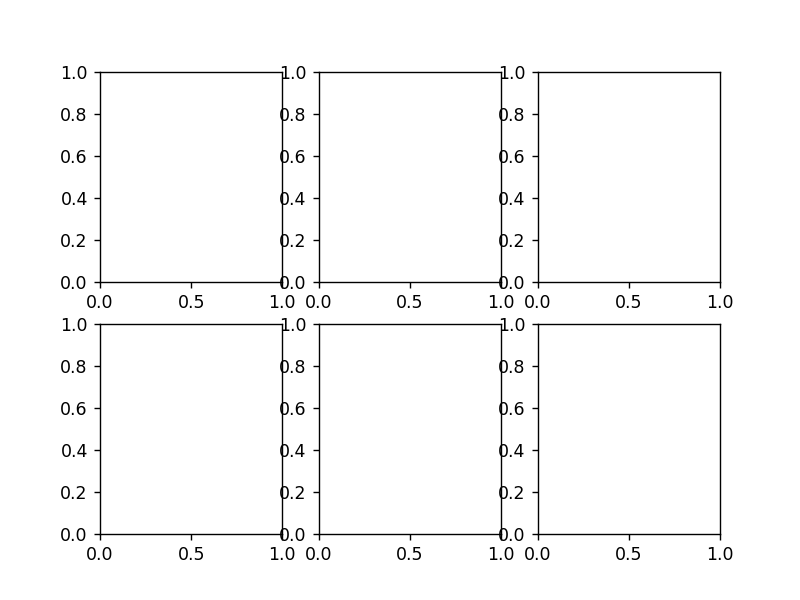

In [25]:
fig

### `pyplot.subplots` options

|Argument|Description|
| :----- | :----------|
|nrows|Number of rows of subplots|
|ncols|Number of columns of subplots|
|sharex|所有的subplots使用相同的x-axis ticks(调整xlim会影响所有的subplots)|
|sharey|所有的subplots使用相同的y-axis ticks(调整ylim会影响所有的subplots)|
|subplot_kw|Dict of keywords passed to `add_subplot` call used to create each subplot|
|\*\*fig_kw|Additional keywords to subplots are used when creating the figure, such as `plt.subplot(2, 2, figsize=(8, 6))`|

### Adjusting the spacing around subplots（调整subplots的间距）

默认情况下，matplotib会在subplots外围留下一定的边距(a certain amount of padding around the outside of the subplots)，并在subplots之间留下一定的间距(spacing)。间距(spacing)与图像的高度(height)宽度(width)有关, so that if u resize the plot(调整图像大小) either programmatically or(编程) manually using the GUI window(手动), the plot will dynamically(自动地) adjust itself.

使用Figure对象的`subplots_adjust`方法可以change the spacing，此外它也是top-level func(顶级函数)

```python
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
```
`wspace`和`hspace`各自控制the percent of the figure width and figure height to use as spacing between subplots.

shrink the spacing all the way to 0:

<IPython.core.display.Javascript object>


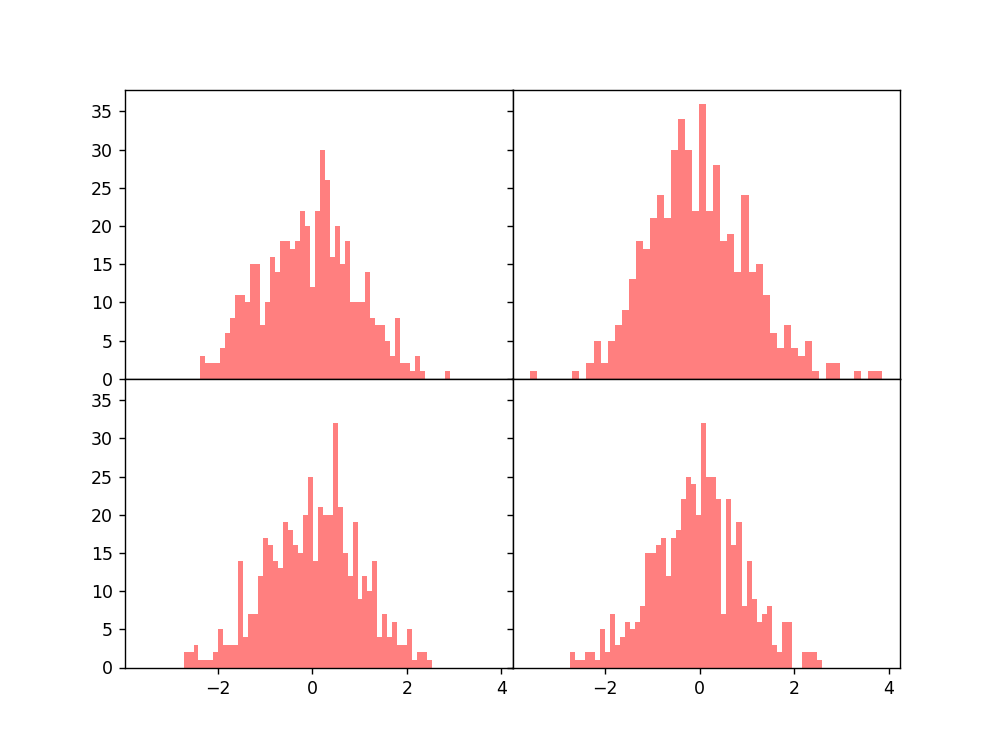

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='r', alpha=.5)
plt.subplots_adjust(wspace=0, hspace=0)

> 轴标签重叠了(overlap)。matplotlib不会检查标签是否重叠，这种情况只能fix the labels yourself by specifying explicit(明确的) tick locations (刻度位置)and tick labels(刻度标签)。

### Colors, Markers and Line Style

<IPython.core.display.Javascript object>


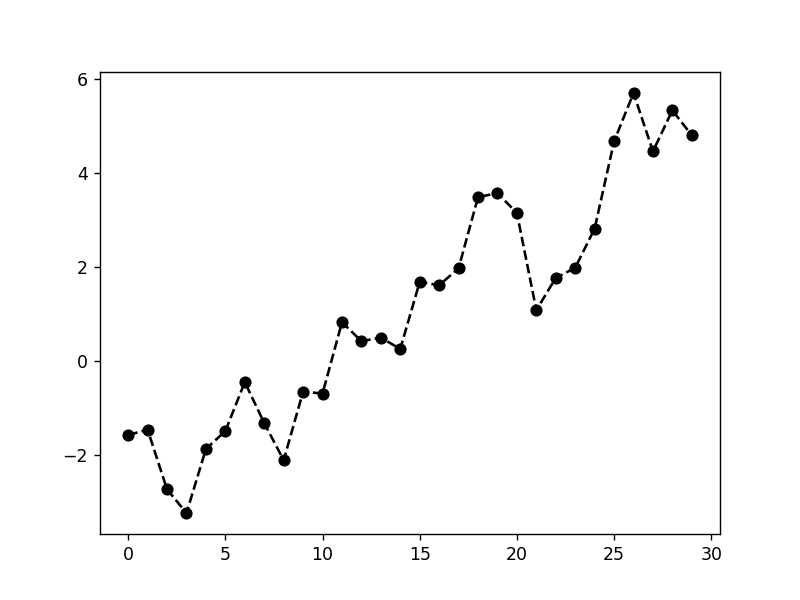

In [34]:
plt.figure()
plt.plot(np.random.randn(30).cumsum(), 'ko--')

或者写成
```python
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='--'(or 'dashed'), marker='o')
```

线型图中，非实际数据点默认是按线性方式插值的，可以通过drawstyle修改

In [40]:
data = np.random.randn(30).cumsum()

In [41]:
data

array([ -0.24950871,  -0.03348746,  -1.39800248,   0.04806217,
        -1.09318767,  -1.925642  ,  -2.73448462,  -3.53056747,
        -4.06709598,  -3.37871989,  -4.64980461,  -3.89100044,
        -5.98143443,  -6.72730882,  -6.61872333,  -7.96594702,
        -8.89205092,  -9.89371793,  -8.88624447,  -7.20914029,
        -6.84441243,  -7.6974207 ,  -9.15983291, -10.62095327,
       -10.63110484, -10.62130075, -10.90458388, -10.97947854,
       -10.39262877, -10.24149202])

<IPython.core.display.Javascript object>


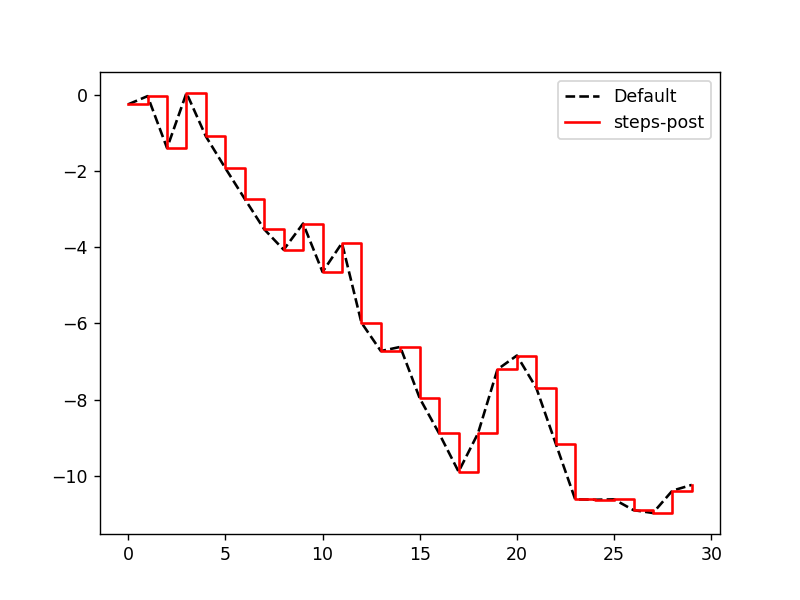

In [43]:
plt.figure()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'r-', drawstyle='steps-post', label='steps-post')
plt.legend()

### Ticks, Labels, and Legends

**xlim: plot range图表的范围**

In [44]:
plt.xlim()

(-1.4500000000000002, 30.45)

> return the current x-axis plotting range

**xticks: tick location刻度位置**

In [45]:
plt.xticks()

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

1. Called with no parameters returns the current parameter value
2. Called with parameters sets the parameter value

所有这些方法都是对当前或最近创建的*AxesSupplot*起作用的。它们各自对应subplot对象上的两个方法。如：`ax.set_xlim`和`ax.get_xlim`。

### Setting the title, axis labels, ticks, and ticklabels

illustrate customizing the axes(轴的自定义)

<IPython.core.display.Javascript object>


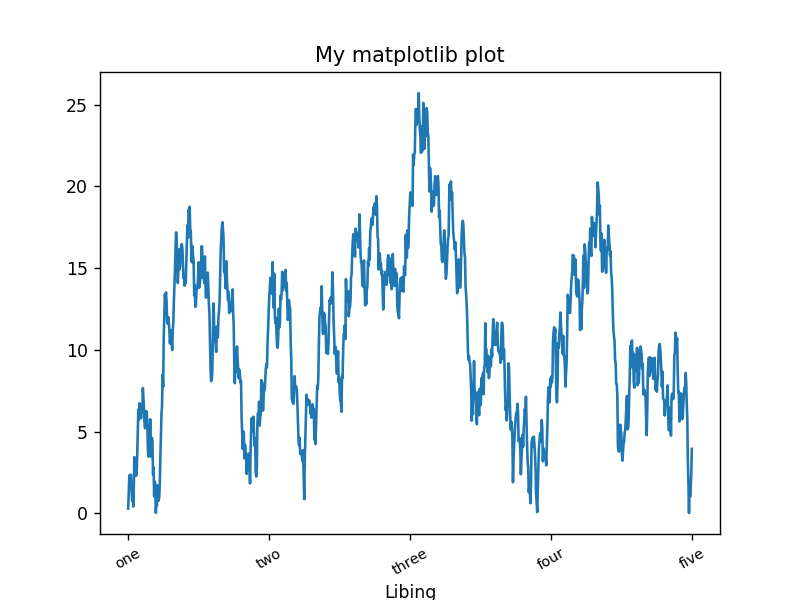

In [49]:
fig = plt.figure()

In [50]:
ax = fig.add_subplot(1, 1, 1)

In [51]:
ax.plot(np.random.randn(1000).cumsum())

**修改X轴的刻度（x-axis ticks），use `set_xticks`和`set_xticklabels`。**`set_xticks`instructs matplotlib where to pace the ticks along the data range(要将刻度放在数据范围中的哪些位置)，默认情况下，这些位置就是刻度标签。可以通过`set_xticklabels`将任何其他的用作标签。

In [52]:
# set x-axis ticks（设置X轴刻度）
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [53]:
# set x-axis tick labesl
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

> The `roration` option sets the x tick labels at a 30-degree roration.

**`set_xlabel` gives a name to the x-axis**

In [55]:
ax.set_xlabel('Libing')

Text(0.5,15.5284,'Libing')

**`set_title` sets the plot title**

In [56]:
ax.set_title('My matplotlib plot')

Text(0.5,1,'My matplotlib plot')

**The `axes` class has a `set` method that allows batch setting(批设置) of plot properties.**

前面的可写成：
```python
props = {
    'title': 'My matplotlib plot',
    'xlabels': 'Libing'
}
ax.set(**props)
```

Y轴的设置与X轴一样，把x写成y即可。

### Adding legends

Legends are another critical element for identifying plot elements.

有两种方式添加lengend

<IPython.core.display.Javascript object>


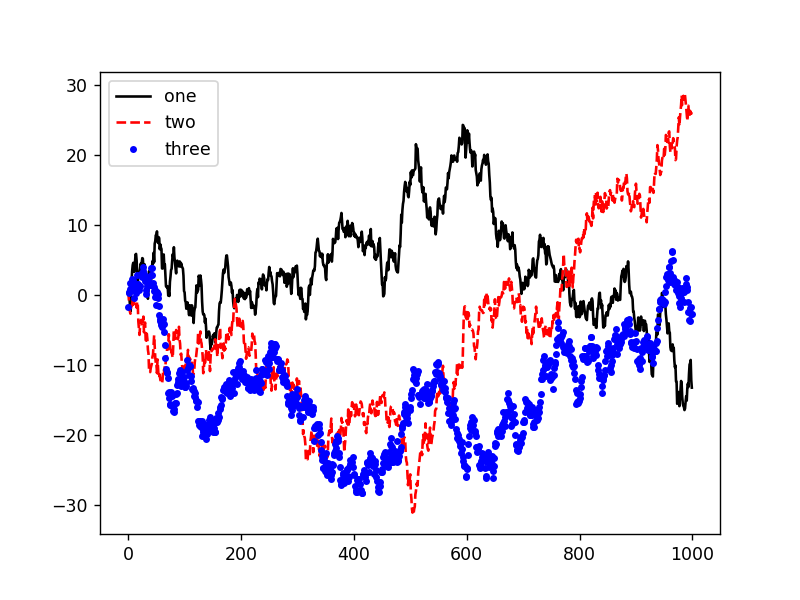

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)

In [63]:
ax.plot(np.random.randn(1000).cumsum(),
        'k', label='one')

In [64]:
ax.plot(np.random.randn(1000).cumsum(),
        'r--', label='two')

In [65]:
ax.plot(np.random.randn(1000).cumsum(),
        'b.', label='three')

after,**either call `ax.legend()` or `plt.legend()` to automatically create a legend**

In [66]:
ax.legend(loc='best')

see the docstring (with ax.legend?) for more info

`loc` tells where to place the plot.

To exclude one or more elements from the legend(从legend中去除一个或多个元素), pass no label or `label='_nolegend_'`

### Annotations(注解) and Drawing on a Subplot(在subplot上绘图)

draw your own annotations, which could consist of *text*, *arrows*, or *other shapes*.

**Add annotations and text using the `text`, `arrow`, and `annotate` funcs.**

`text` draws text at given coordinates (x, y) on the plot with optional custom styling:
```python
ax.text(x, y, 'Hello, Li', family='monospace(等宽字体)', fontsize=10)
```

**Annotations can draw both text and arrows arranged appropriately.**

<IPython.core.display.Javascript object>


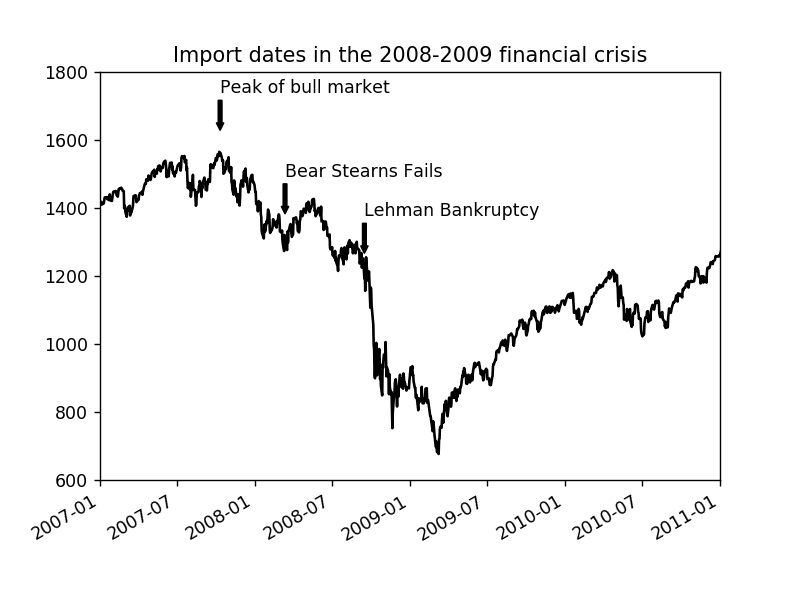

Text(0.5,1,'Import dates in the 2008-2009 financial crisis')

In [71]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(111)

data = pd.read_csv(r'F:\Downloads\pydata-book-2nd-edition\examples\spx.csv',
                   index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_date = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), "Bear Stearns Fails"),
               (datetime(2008, 9, 15), "Lehman Bankruptcy")]

for date, label in crisis_date:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                               headlength=4),
                horizontalalignment='left', verticalalignment='top')

# zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Import dates in the 2008-2009 financial crisis')

`ax.annotate` method can draw labels at the indicated x and y.

`set_xlim` and `set_ylim` methods to manually set the start and end boundaries for the plot rather than using matplotlib's default.

In [73]:
spx.head()

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

In [75]:
spx.asof('1990-02-01')

328.79

常见图形的对象，这些对象被称为**块（patch）**。 有些在`matplotlib.pyplot`中，如`Rectangle`，`Circle`，但完整集合在`matplotlib.patches`中。

**在图表（plot）中增加一个图形（shape）**，需要创建patch object `shp`，然后通过`ax.add_patch(shp)`将其添加到subplot中。

<IPython.core.display.Javascript object>


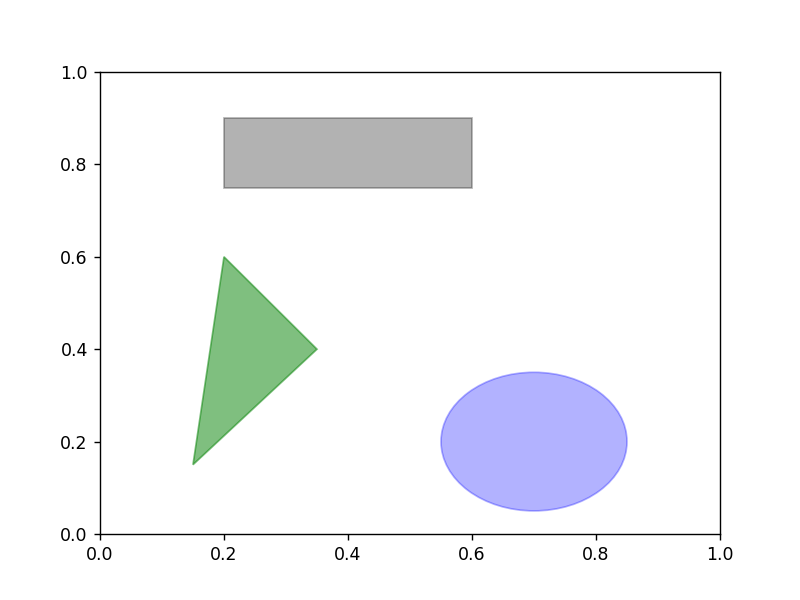

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

save the active figure to file using `plt.savefig`. This is equivalent to the figure object's `savefig` instance method.
```python
plt.savefig('figpath.svg')
```

The file type is inferred from the file extension.

There are a couple of important options used frequently for publishing graphics: **dpi**(which controls the dots-per-inch resolution,每英寸点数分辨率)and **bbox_inches**(trim the whitespace around the actual figure，剪除当前图表周围的空白部分).

得到带有最小白边且分辨率为400DPI的PNDG图片：
```python
plt.savefig('figpath', dpi=400, bbox_inches='tight')
```

`savefig` doesn't have to write to disk, it can also write to any file-like object, such as a *BytesIO*:
```python
from io import BytesIO
buffer = BytesIO(buffer)
plt.savefig(buffer)
plot_data = buffer.get_value()
```

# Plotting with pandas and [seaborn](https://seaborn.pydata.org/)

`seaborn` is a statistical graphics library.

Importing seaborn modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics(美学).

### Liear Plots

**Series and DataFrame** each have a **`plot` attribute** for making some basic plot types. By default, `plot()` makes line plots.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
s = pd.Series(np.random.randn(10).cumsum(),
              index=np.arange(0, 100, 10))

In [4]:
s

0     0.168090
10    0.652099
20    1.395009
30    2.262059
40    3.081060
50    2.190057
60    2.908140
70    2.599976
80    4.047549
90    4.400458
dtype: float64

<IPython.core.display.Javascript object>


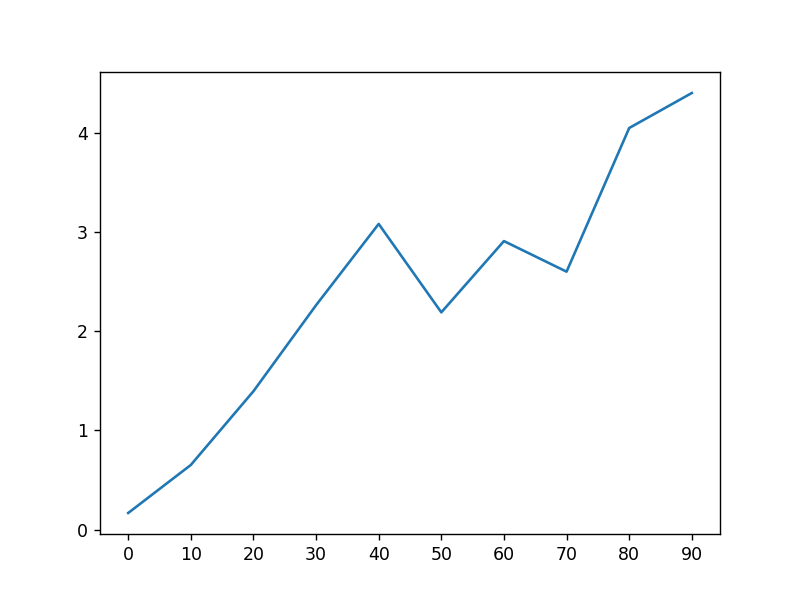

In [5]:
s.plot()

In [6]:
plt.xticks(list(range(0, 100, 10)))

([<matplotlib.axis.XTick at 0x14fa6092550>,
 <a list of 10 Text xticklabel objects>)

The **Series object's index** is passed to matplotlib for plotting on the **x-axis**, though u can diable this by passing `use_index=False`.

The x-axis ticks and limits can be adjusted with the `xticks` and `xlim` options, and y-axis respectively with `yticks` and `ylim`.

### Series.plot method arguments

|Argument|Description|
| :----- | :-------- |
|label|Label for plot legeng|
|ax|matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot|
|style|Style string, like 'ko--', to be passed to matplotlib|
|alpha|The plot fill opacity(填充不透明度) (from 0 to 1)|
|kind|Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line'(default), 'pie'|
|logy|Use logarithmic scaling on the y-axis|
|use_index|Use the object index for tick labels|
|rot|Rotation of tick labels (0 through 360)|
|xticks|Values to use for x-axis ticks|
|yticks|Values to use for y-axis ticks|
|xlim|x-axis limits (e.g., [0, 10])|
|ylim|y-axis limits|
|grid|Display axis grid(显示轴网格线) (on by default)|

**Most of pandas's plotting methods accept an optional `ax` parameter**, which can be a matplotlib subplot object. This gives u more flexible placement of subplots in a grid layout.

**DataFrame's `plot` method** plots each of its columns as a different line on the same subplot, creating a legend automatically:

In [7]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=list("ABCD"),
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.211723,-1.489583,0.316268,-2.167129
10,-0.996758,-1.585714,0.467587,-1.979064
20,-1.453338,-1.629136,-0.497205,-2.341186
30,-0.197887,-0.923646,-1.300267,-2.127937
40,-0.720957,0.243456,-1.804102,-1.578183
50,-0.107677,0.783379,-1.635675,-2.492630
60,-0.826542,0.107603,-2.278215,-3.617904
70,0.624413,-0.744816,-1.984110,-3.578670
80,2.764667,1.242690,-3.179434,-5.090684
90,1.744763,0.133274,-3.707147,-5.289334


<IPython.core.display.Javascript object>


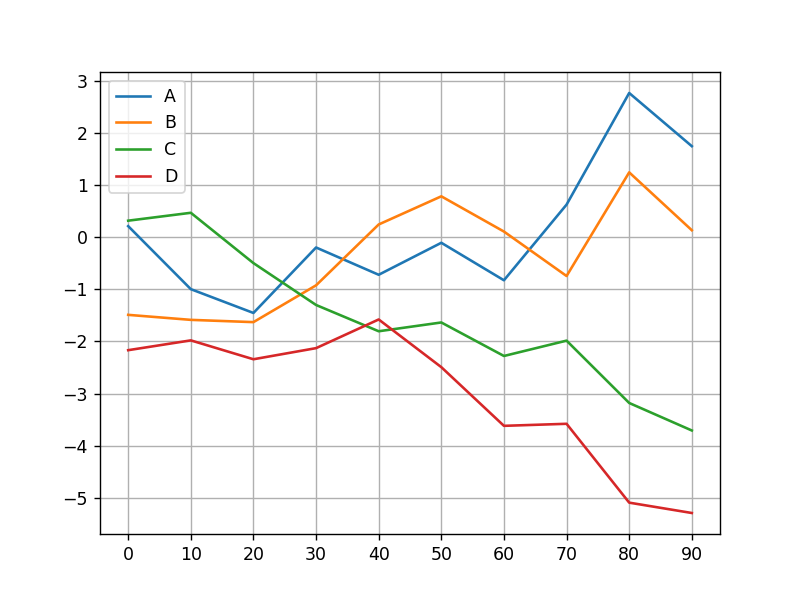

In [15]:
df.plot(xticks=list(range(0, 100, 10)), grid=True)

### DataFrame-specific plot arguments

|Arguments|Description|
| :------ | :-------- |
|subplots|Plot each DataFrame column in a separate subplot|
|sharex|If `subplots=True`, share the same x-axis, linking ticks and limits|
|sharey|If `subplots=True`, share the same y-axis|
|figsize|Size of figure to create as tuple|
|title|Plot title as string|
|legend|Add a subplot legend (True by default)|
|sort_columns|Plot columns in alphabetical order (以字母顺序绘制各列); by default uses existing coluumn order|

### Bar Plots (柱状图)

The `plot.bar()` and `plot.barh()` maker **vertical and horizontal bar plots(垂直柱状图和水平柱状图)**, respectively. In this case, the **Series and DataFrame index** will be used as the **x (bar) or y (barh) ticks**:

<IPython.core.display.Javascript object>


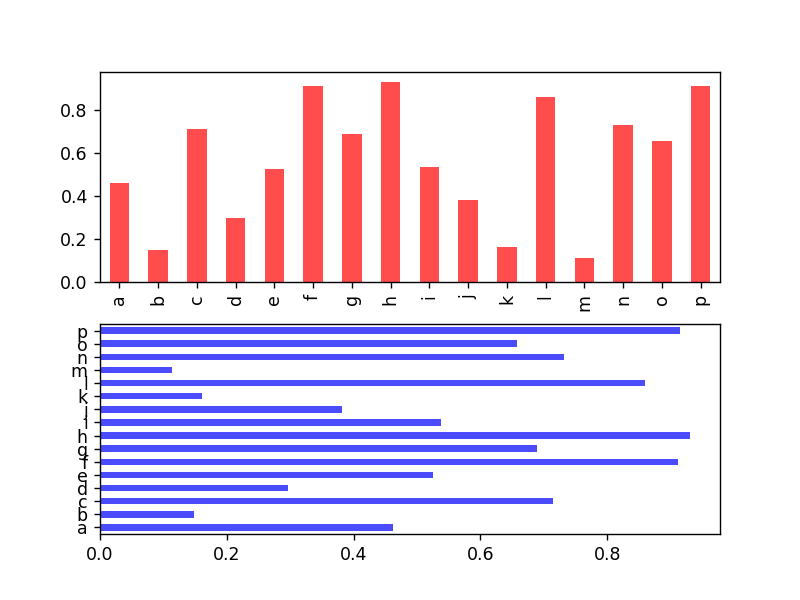

In [17]:
fig, axes = plt.subplots(2, 1)

In [18]:
data = pd.Series(np.random.rand(16),
                 index=list('abcdefghijklmnop'))

In [19]:
data.plot.bar(ax=axes[0], color='r', alpha=0.7)

In [20]:
data.plot.barh(ax=axes[1], color='b', alpha=.7)

> bar: vertical bar plots; barh: horizontal bar plots

With a **DataFrame**, bar plots group the values in each row together in a group in bars, side by side, for each value:

柱状图会将每一行的值分为一组

In [21]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(list('ABCD'), name='Libing'))

In [22]:
df

Libing,A,B,C,D
one,0.106320,0.901637,0.846805,0.595779
two,0.545832,0.323547,0.547236,0.023348
three,0.222837,0.848642,0.234528,0.241681
four,0.574618,0.927977,0.603677,0.936842
five,0.398509,0.081340,0.126654,0.790144
six,0.160849,0.682800,0.623856,0.669012


<IPython.core.display.Javascript object>


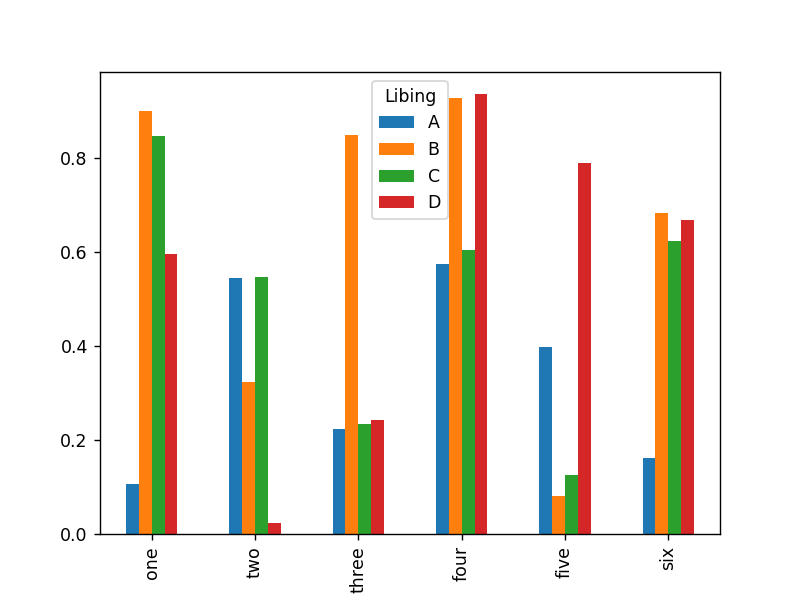

In [23]:
df.plot.bar()

create **stacked bar plots** from a DataFrame by passing `stacked=True`, resulting in the value in each row being stacked together:

<IPython.core.display.Javascript object>


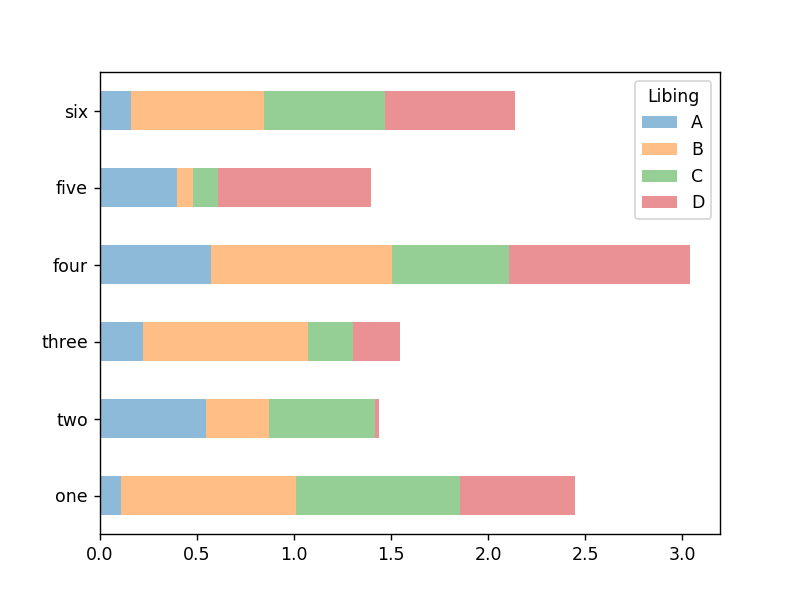

In [25]:
df.plot.barh(stacked=True, alpha=.5)

**Note that the "Libing" on the DataFrame's columns is used to title the legend.**

**A useful recipe (妙法) for bar plots is to visualize a Series's value frequency using `value_counts`: `s.value_counts().plot.bar()`.**

做一张stacked bar plot展示每天各种聚会规模的数据点的百分比

In [27]:
tips = pd.read_csv(r'F:\Downloads\pydata-book-2nd-edition\examples\tips.csv')

In [30]:
tips.head(8)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4


In [31]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [32]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [33]:
# Not mant 1- and 6-peason parties
party_counts = party_counts.loc[:, 2:5]

In [34]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [35]:
party_counts.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [37]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


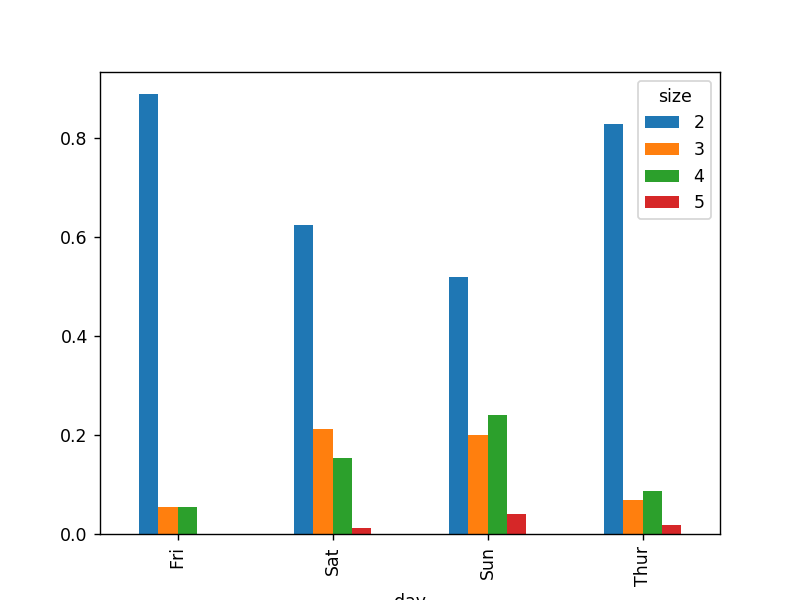

In [45]:
party_pcts.plot.bar()

With data that requires aggregation or summarization before making a plot, using the **seaborn** package can make things much simpler.

In [40]:
import seaborn as sns

In [42]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [43]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


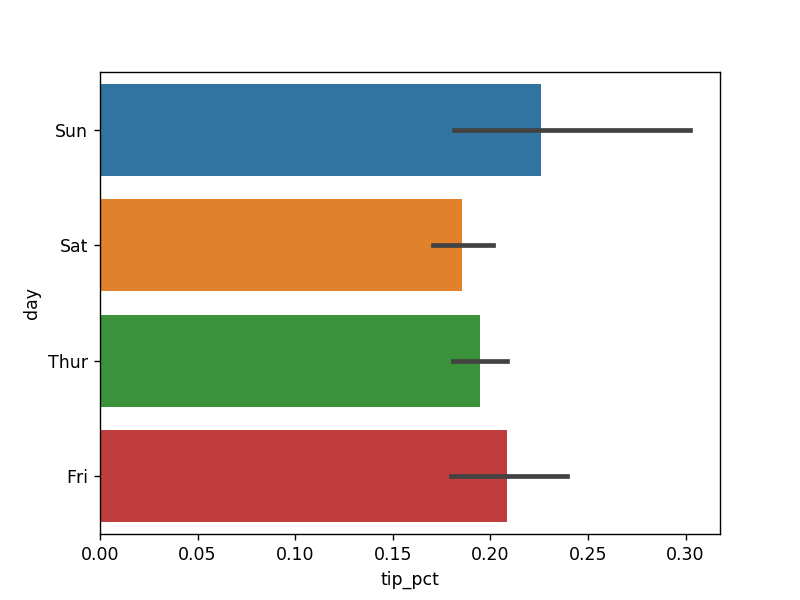

In [48]:
plt.figure()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

There are multiple observations for each value in the *day*, the bars are the average value of *tip_pct*.

The black lines drawn on the bars represent the 95% confidence interval (this can be configured through optional arguments)

`seaborn.barplot` has a *hue* option that enables us to split by an additional categorical value.

<IPython.core.display.Javascript object>


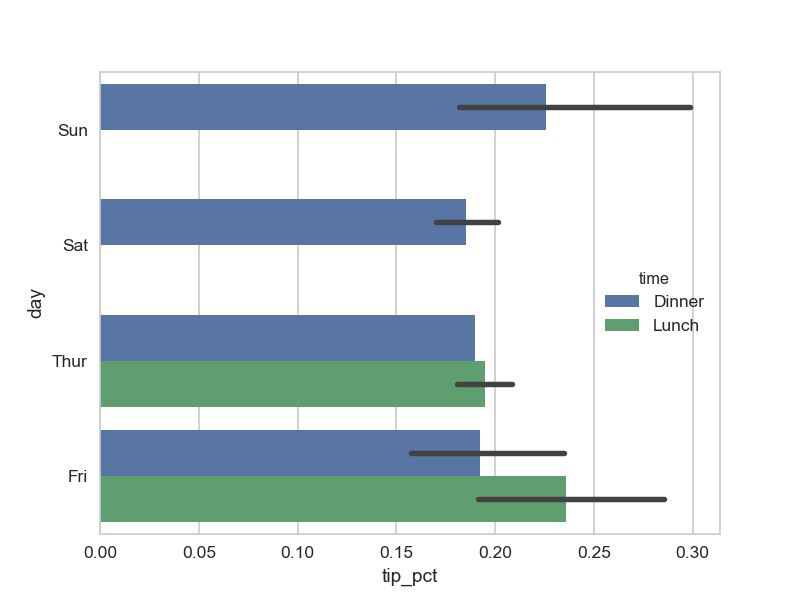

In [56]:
plt.figure()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Note that seaborn has automatically changed the aesthetics of plots: the default color palette (调色板), plot background, and grid line colors. You can switch between different plot appearances using `seaborn.set`:

In [57]:
sns.set(style='whitegrid')

### Histograms and Density Plots

A **histogram** is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. 

是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。

<IPython.core.display.Javascript object>


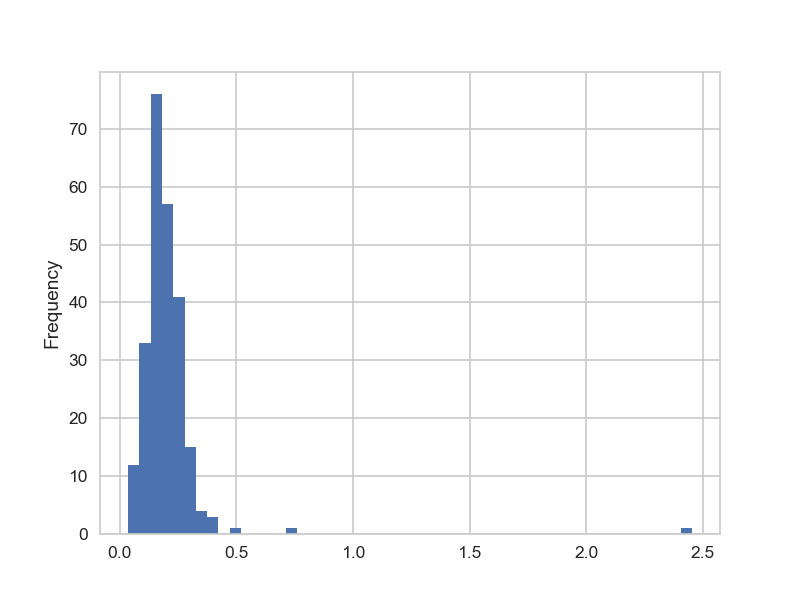

In [58]:
plt.figure()
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a **density plot（密度图）**, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as a mixture of "kernel" - that is, simpler distribution like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. Using `plot.kde` makes a density plot using the conventional mixture-of-normals estimate:

密度图是通过计算“可能产生观测数据的连续概率分布的估计”而产生的。一般过程是将该分布近似为一组核（即诸如正态（高斯）分布之类的较为简单的分布）。因此，**密度图也被称作KDE（Kernel Density Estimate, 核密度估计）**。

<IPython.core.display.Javascript object>


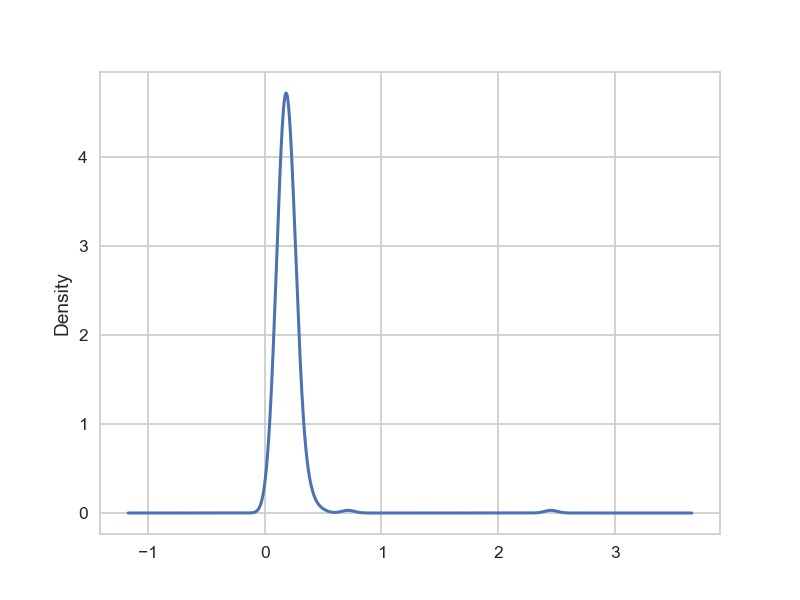

In [60]:
plt.figure()
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its `displot` method, which can plot both a histogram and a continuous density estimate simultaneously (同时地).

Consider a bimodal(双峰的) distribution consisting of draws from two different standard normal distributions:

<IPython.core.display.Javascript object>


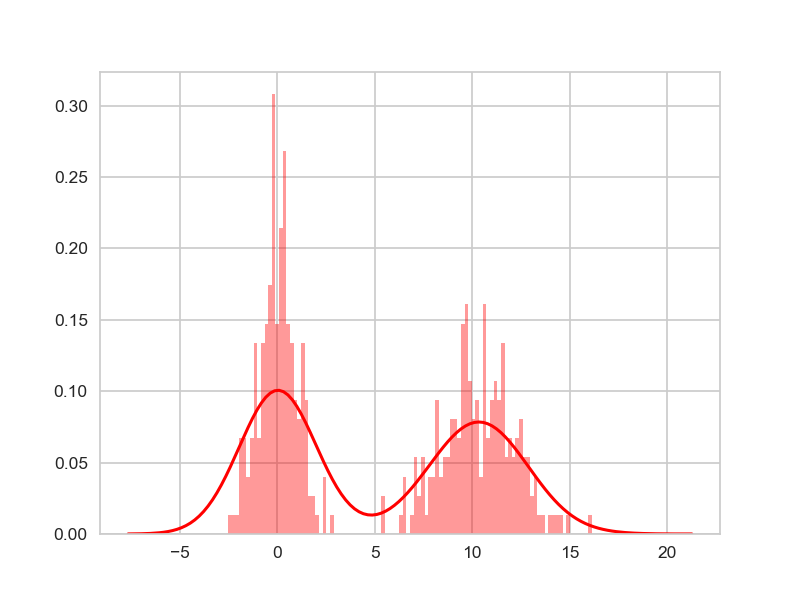

C:\Users\libin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [65]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

plt.figure()
sns.distplot(values, bins=100, color='r')

### Scatters（散布图） or Point Plots（点图）

 Points plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series.

In [66]:
macro = pd.read_csv(r'F:\Downloads\pydata-book-2nd-edition\examples\macrodata.csv')

In [68]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [69]:
data.head()

,cpi,m1,tbilrate,unemp
0,28.98,139.7,2.82,5.8
1,29.15,141.7,3.08,5.1
2,29.35,140.5,3.82,5.3
3,29.37,140.0,4.33,5.6
4,29.54,139.6,3.50,5.2


In [83]:
trans_data = np.log(data)

In [84]:
trans_data.head()

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707
3,3.379974,4.941642,1.465568,1.722767
4,3.385745,4.938781,1.252763,1.648659


In [85]:
trans_data = np.log(data).diff()

In [86]:
trans_data.head()

,cpi,m1,tbilrate,unemp
0,NaN,NaN,NaN,NaN
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108


In [88]:
trans_data = trans_data.dropna()

In [89]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


uses seaborn's `regplot` method, which makes a scatter plot and fits a linear regression line:

<IPython.core.display.Javascript object>


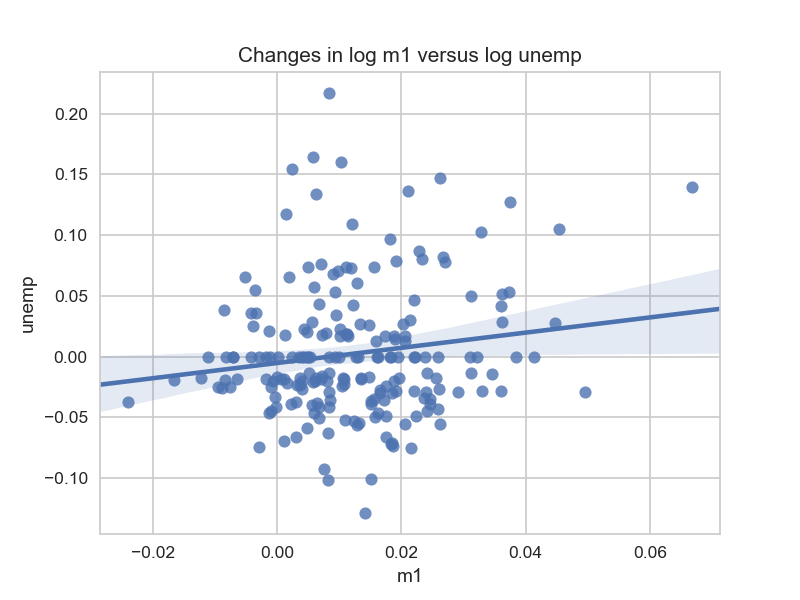

In [90]:
plt.figure()
sns.regplot('m1', 'unemp', data=trans_data)

In [91]:
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5,1,'Changes in log m1 versus log unemp')

In exploratory data analysis it's helpful to be able to look at all the scatter plots among a group of variables; this is known as a *paris* plot or *scatter plot matrix (散布图矩阵)*.

Making such a plot from scratch is a bit of work, so seaborn has a convenient *pairplot* func, which supports placing histograms or density estimates of each variable along the diagonal(在对角线上放置各变量的直方图或密度图).

<IPython.core.display.Javascript object>


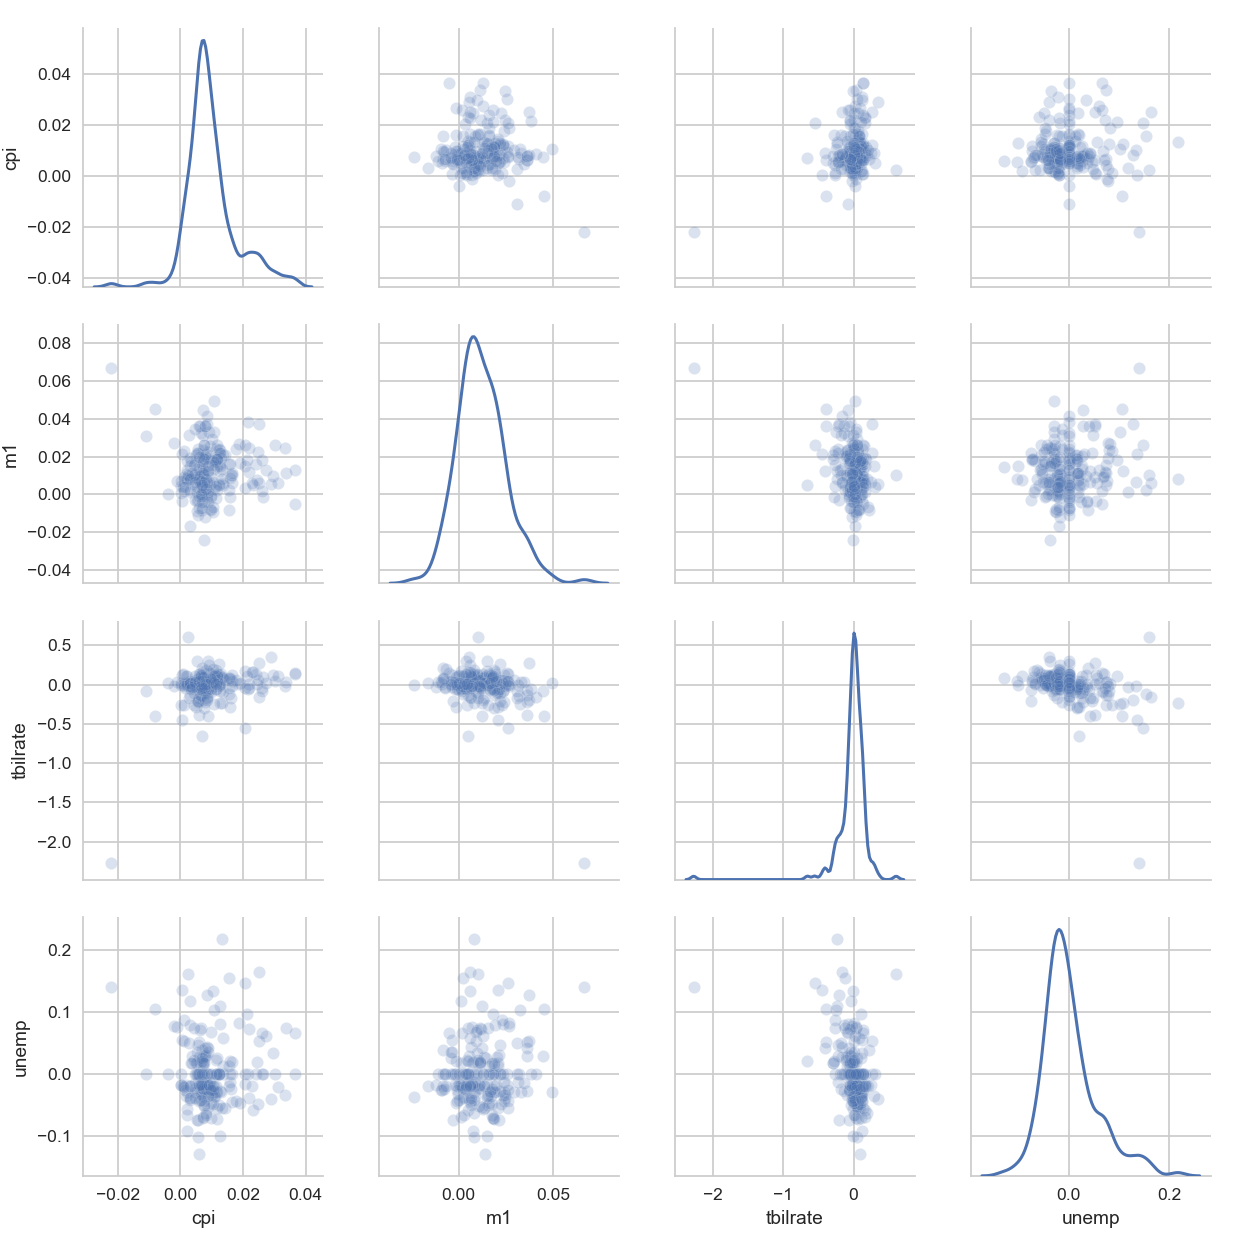

In [92]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

> `plot_kws` argument enables us to pass down configuration options to the individual plotting calls on the off-diagonal(非对角线).

### Facet Grids and Categorical Data

One way to **visualize data with many categorical variables** is to use a ***facet grid***. Seaborn has a useful built-in func `factorplot` that simplifies making many kinds of faceted plots.

In [93]:
data = tips[tips.tip_pct < 1]

In [94]:
data.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


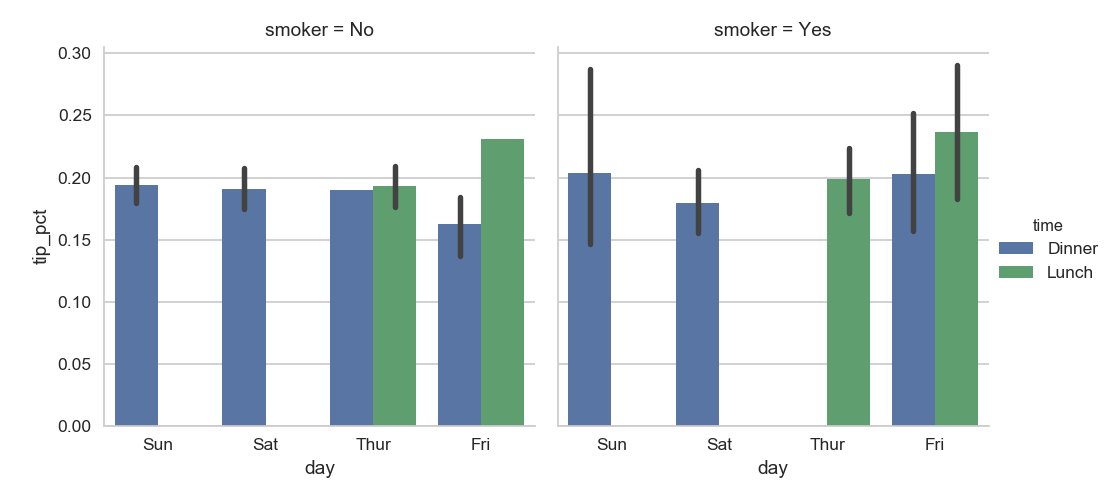

In [95]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=data)

Instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per *time* value.

<IPython.core.display.Javascript object>


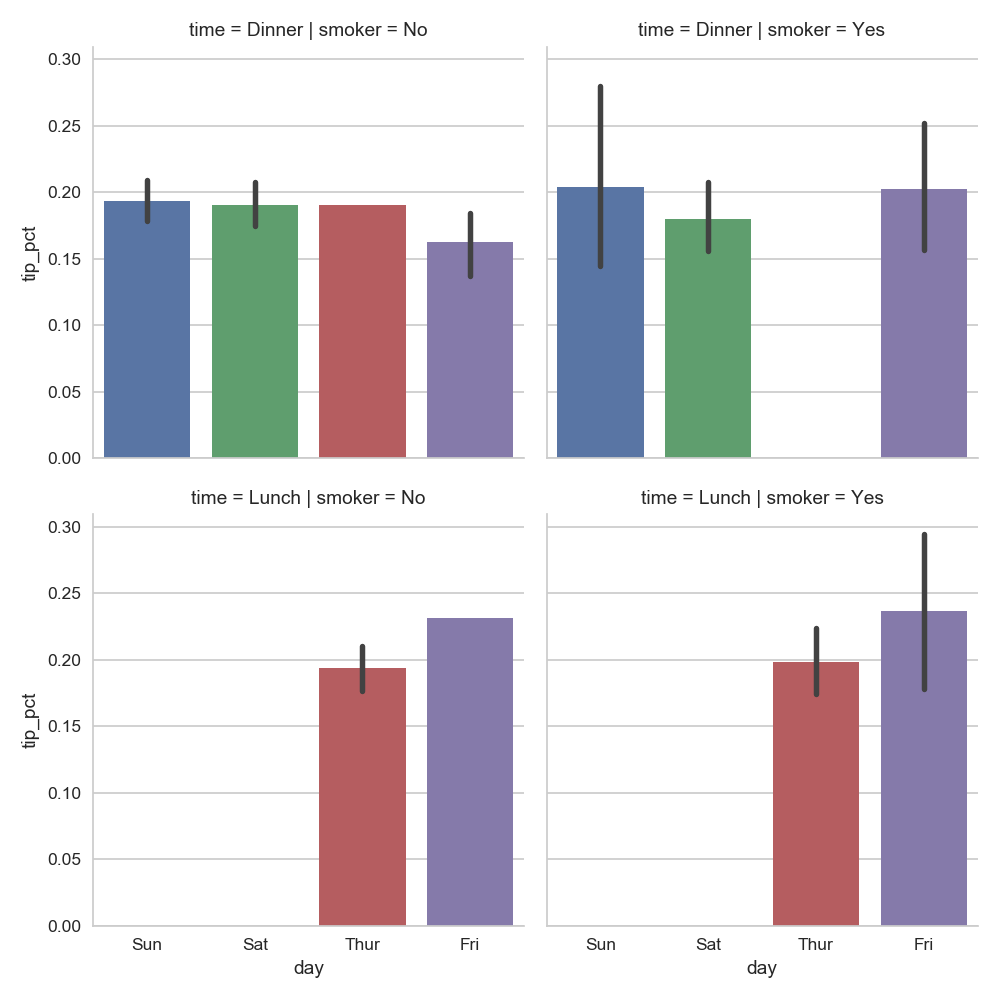

In [96]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',
               kind='bar', data=data)

`factorplot` supports other plot types that may be useful depending on what u are trying to display.

box plots (which show the median, quartiles, and outliers) can be an effective visualization type.

<IPython.core.display.Javascript object>


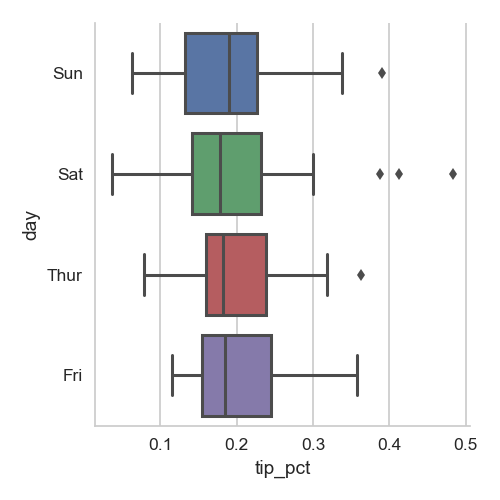

In [97]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

U can create your own facet grid plots using the more general `seaborn.FacetGrid` class.